In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("HR.csv")

In [3]:
df.shape

(54808, 14)

In [4]:
df.head

<bound method NDFrame.head of        employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  a

In [5]:
df.info #summary

<bound method DataFrame.info of        employee_id         department     region         education gender  \
0            65438  Sales & Marketing   region_7  Master's & above      f   
1            65141         Operations  region_22        Bachelor's      m   
2             7513  Sales & Marketing  region_19        Bachelor's      m   
3             2542  Sales & Marketing  region_23        Bachelor's      m   
4            48945         Technology  region_26        Bachelor's      m   
...            ...                ...        ...               ...    ...   
54803         3030         Technology  region_14        Bachelor's      m   
54804        74592         Operations  region_27  Master's & above      f   
54805        13918          Analytics   region_1        Bachelor's      m   
54806        13614  Sales & Marketing   region_9               NaN      m   
54807        51526                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings 

In [6]:
print("shape of dataframe is:",df.shape)
df.info()
df.describe() #saath mein run krne pr aise aayega

shape of dataframe is: (54808, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)


,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


# DATA CLEANING

In [7]:
#REMOVING COLUMN WITH ONE UNIQUE VALUE

In [8]:
featureValues = {}
for d in df.columns.tolist():
    count=df[d].nunique() #counting and storing unique value
    if count==1:
        featureValues[d]=count
cols_to_drop= list(featureValues.keys())
print("Columns having 1 unique value are:n", cols_to_drop)


Columns having 1 unique value are:n []


In [9]:
#Removing employee_id as its not a unique identifier

In [10]:
df.drop("employee_id", inplace=True, axis=1)#1 is for column and 0 is for rows in pandas library
#checking null percentage
df.isnull().mean()*100

department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

In [11]:
df.isnull()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,False,False,False,False,False,False,False,False,False,False,False,False,False
54804,False,False,False,False,False,False,False,False,False,False,False,False,False
54805,False,False,False,False,False,False,False,False,False,False,False,False,False
54806,False,False,True,False,False,False,False,False,False,False,False,False,False


In [12]:
df['previous_year_rating']=df['previous_year_rating'].fillna(0) #filling 0 in place of empty blanks in the column

In [13]:
df['education']=df['education'].fillna("Bachelor's") #filling bachelor's in blank

In [14]:
print(df)

              department     region         education gender  \
0      Sales & Marketing   region_7  Master's & above      f   
1             Operations  region_22        Bachelor's      m   
2      Sales & Marketing  region_19        Bachelor's      m   
3      Sales & Marketing  region_23        Bachelor's      m   
4             Technology  region_26        Bachelor's      m   
...                  ...        ...               ...    ...   
54803         Technology  region_14        Bachelor's      m   
54804         Operations  region_27  Master's & above      f   
54805          Analytics   region_1        Bachelor's      m   
54806  Sales & Marketing   region_9        Bachelor's      m   
54807                 HR  region_22        Bachelor's      m   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   35                   5.0   
1                   other                1   30                   5.0   
2           

In [15]:
df.isnull().mean()*100

department              0.0
region                  0.0
education               0.0
gender                  0.0
recruitment_channel     0.0
no_of_trainings         0.0
age                     0.0
previous_year_rating    0.0
length_of_service       0.0
KPIs_met >80%           0.0
awards_won?             0.0
avg_training_score      0.0
is_promoted             0.0
dtype: float64

In [16]:
df['previous_year_rating']=df['previous_year_rating'].astype("int")#changing string into variable

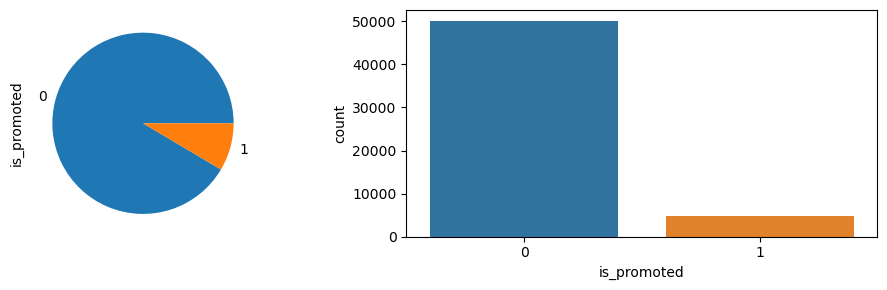

In [17]:
fig= plt.figure(figsize=(10,3))
fig.add_subplot(1,2,1)
a=df["is_promoted"].value_counts(normalize=True).plot.pie()
fig.add_subplot(1,2,2)
churnchart=sns.countplot(x=df["is_promoted"])
plt.tight_layout()
plt.show()


In [18]:
#as per the data there is class imbalance

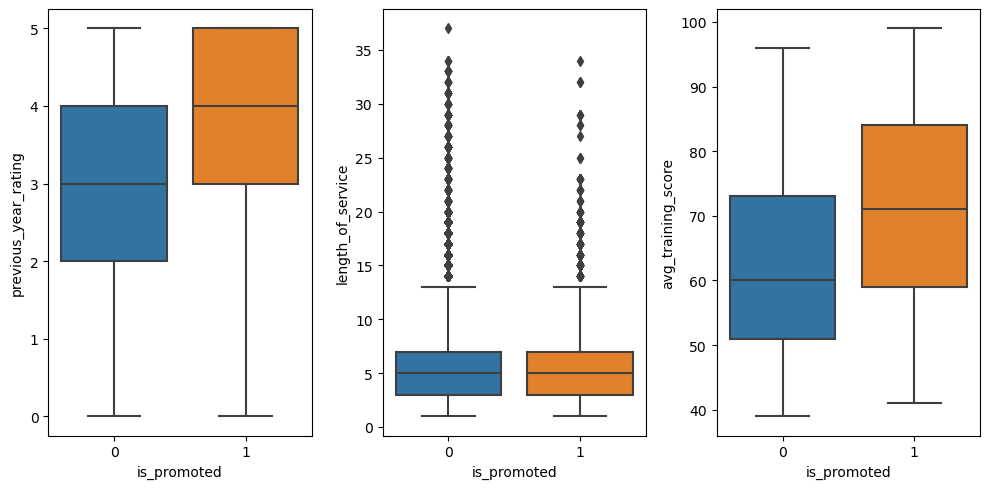

In [19]:
fig=	plt.figure(figsize=(10,5))	
fig.add_subplot(1,3,1)
ar_6=sns.boxplot(x=df["is_promoted"],y=df["previous_year_rating"])
fig.add_subplot(1,3,2)
ar_6=sns.boxplot(x=df["is_promoted"],y=df["length_of_service"])
fig.add_subplot(1,3,3)
ar_6=sns.boxplot(x=df["is_promoted"],y=df["avg_training_score"])#relationship b/w target variable and independent variable
plt.tight_layout()
plt.show()

C:\Users\anike\AppData\Local\Temp\ipykernel_35556\1790705743.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_plot=sns.heatmap(df.corr(),annot=True,linewidths=3)


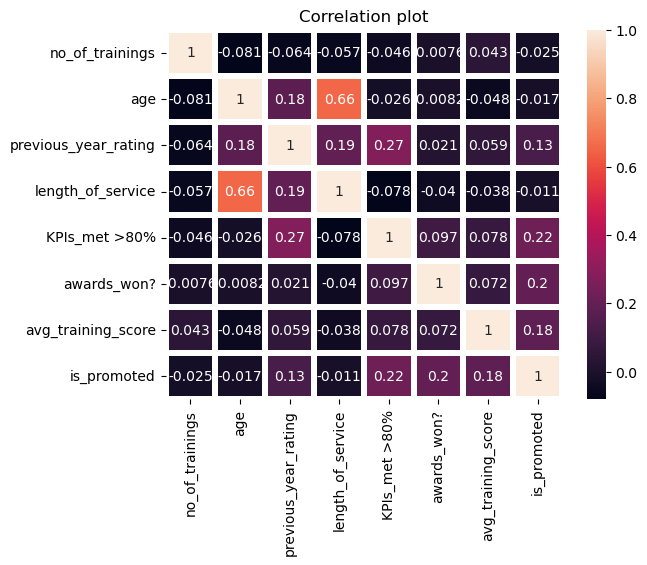

In [20]:
corr_plot=sns.heatmap(df.corr(),annot=True,linewidths=3)
plt.title("Correlation plot")
plt.show()

# Feature Engineering

In [21]:
#Converting categorical data into one hot encoding
df["gender"]=df["gender"].apply(lambda	x:	1	if	x=="m" else 0)

In [22]:
print(df)

              department     region         education  gender  \
0      Sales & Marketing   region_7  Master's & above       0   
1             Operations  region_22        Bachelor's       1   
2      Sales & Marketing  region_19        Bachelor's       1   
3      Sales & Marketing  region_23        Bachelor's       1   
4             Technology  region_26        Bachelor's       1   
...                  ...        ...               ...     ...   
54803         Technology  region_14        Bachelor's       1   
54804         Operations  region_27  Master's & above       0   
54805          Analytics   region_1        Bachelor's       1   
54806  Sales & Marketing   region_9        Bachelor's       1   
54807                 HR  region_22        Bachelor's       1   

      recruitment_channel  no_of_trainings  age  previous_year_rating  \
0                sourcing                1   35                     5   
1                   other                1   30                     5   


In [23]:
#list of columns
cols = df.select_dtypes(["object"]).columns #creating objects for dummy
ds=pd.get_dummies(df[cols],drop_first=True) #creating dummy
#concat newly created columns with original dataframe
df=pd.concat([df,ds],axis=1)
#Drop original columns
df.drop(cols,axis=1,inplace=True)


In [24]:
ds

,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_10,region_region_11,...,region_region_4,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,recruitment_channel_referred,recruitment_channel_sourcing
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
54804,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
54805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54806,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [25]:
print(df)

       gender  no_of_trainings  age  previous_year_rating  length_of_service  \
0           0                1   35                     5                  8   
1           1                1   30                     5                  4   
2           1                1   34                     3                  7   
3           1                2   39                     1                 10   
4           1                1   45                     3                  2   
...       ...              ...  ...                   ...                ...   
54803       1                1   48                     3                 17   
54804       0                1   37                     2                  6   
54805       1                1   27                     5                  3   
54806       1                1   29                     1                  2   
54807       1                1   27                     1                  5   

       KPIs_met >80%  awards_won?  avg_

# TRAINING THE MODEL

In [26]:
#Train_Test_Split

In [27]:
from sklearn.model_selection import train_test_split
y = df.pop("is_promoted")
x = df
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,train_size = 0.8)

In [28]:
#getting shape of train & test data
print("train size x:",x_train.shape)
print("train size y: ",y_train.shape)
print("test size x:",x_train.shape)
print("train size y: ",y_train.shape)

train size x: (43846, 53)
train size y:  (43846,)
test size x: (43846, 53)
train size y:  (43846,)


In [29]:
#Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test) #scaling  for different variables in the independent area of the model

In [32]:
#check for distribution	of labels for class imbalance
y_train.value_counts(normalize=True)

0    0.914245
1    0.085755
Name: is_promoted, dtype: float64

In [33]:
#import	library
from sklearn.linear_model	import LogisticRegression
#make	instance	of	model	with	default	parameters	except	class	weight
#as	we	will	add	class	weights	due	to	class	imbalance	problem
lr_basemodel	=LogisticRegression(class_weight={0:0.1,1:0.9})
# here we are penalising the higher class by reducing its weight and increasing the weight of lower class
lr_basemodel.fit(x_train,y_train)


LogisticRegression(class_weight={0: 0.1, 1: 0.9})

In [34]:
predictions = lr_basemodel.predict(x_test)
df2 = pd.DataFrame(predictions)
print(df2)

       0
0      0
1      0
2      0
3      0
4      0
...   ..
10957  0
10958  0
10959  1
10960  0
10961  0

[10962 rows x 1 columns]


In [35]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[7913 2141]
 [ 182  726]]


In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87     10054
           1       0.25      0.80      0.38       908

    accuracy                           0.79     10962
   macro avg       0.62      0.79      0.63     10962
weighted avg       0.92      0.79      0.83     10962

